In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as s
import seaborn as sns

In [3]:
training_data = pd.DataFrame(data={"x":np.random.normal(loc=65,scale=5,size=1000)})

In [4]:
training_data

x
0    58.055345
1    58.823077
2    62.795750
3    63.618373
4    61.317315
..         ...
995  60.988125
996  72.123773
997  67.745210
998  68.395717
999  54.593900

[1000 rows x 1 columns]

(array([  1.,   0.,  11.,  14.,  25.,  30.,  65.,  58.,  81., 114., 131.,
        123., 119.,  80.,  49.,  48.,  27.,  12.,   6.,   6.]),
 array([49.30821327, 50.7840305 , 52.25984772, 53.73566495, 55.21148217,
        56.68729939, 58.16311662, 59.63893384, 61.11475107, 62.59056829,
        64.06638552, 65.54220274, 67.01801997, 68.49383719, 69.96965442,
        71.44547164, 72.92128887, 74.39710609, 75.87292331, 77.34874054,
        78.82455776]),
 <BarContainer object of 20 artists>)

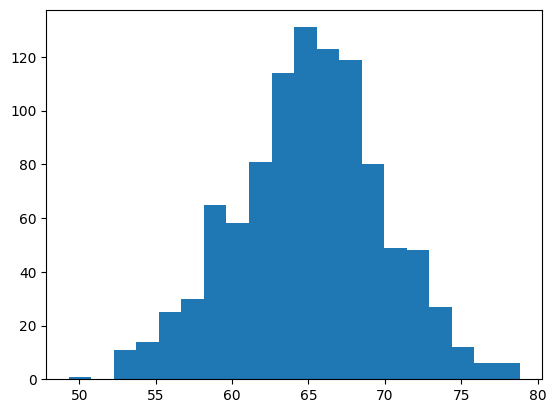

In [5]:
plt.hist(training_data, bins=20)

In [6]:
def negative_log_likelihood(mu, sigma, data):
    n = len(data)
    nll = (n / 2) * np.log(2 * np.pi * sigma**2) + (1 / (2 * sigma**2)) * np.sum((data - mu)**2)
    return nll

In [7]:
mu_values = np.linspace(63, 67, 200)
sigma_values = np.linspace(4, 6, 200)
mu_grid, sigma_grid = np.meshgrid(mu_values, sigma_values)

In [8]:
nll_values = np.zeros_like(mu_grid)

In [9]:
for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        nll_values[i, j] = negative_log_likelihood(mu_grid[i, j], sigma_grid[i, j], training_data)

/home/codespace/.local/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_10643/1097364582.py:3: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  nll_values[i, j] = negative_log_likelihood(mu_grid[i, j], sigma_grid[i, j], training_data)


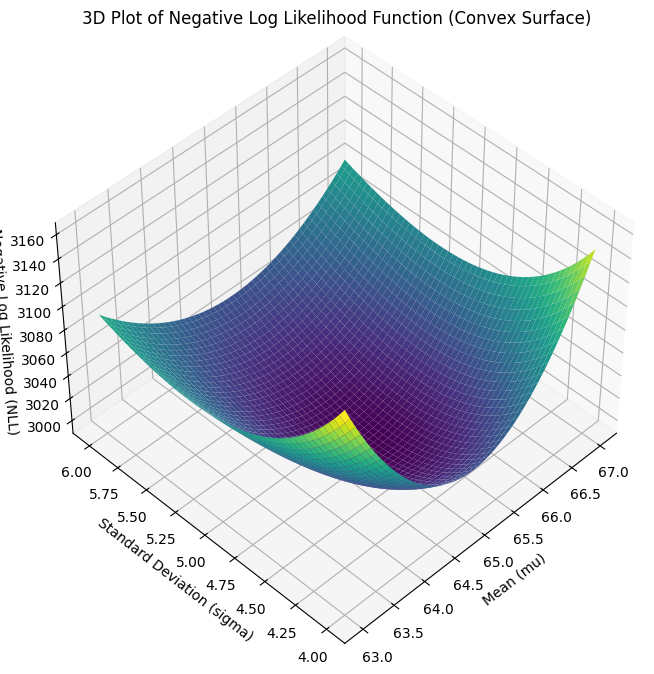

In [10]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(mu_grid, sigma_grid, nll_values, cmap='viridis', edgecolor='none')
ax.set_xlabel('Mean (mu)')
ax.set_ylabel('Standard Deviation (sigma)')
ax.set_zlabel('Negative Log Likelihood (NLL)')
ax.set_title('3D Plot of Negative Log Likelihood Function (Convex Surface)')

# Adjusting the view angle to better visualize the convexity
ax.view_init(elev=45, azim=225)

plt.show()

In [11]:
def del_by_del_nll(mu_initial,sigma_initial):

    del_by_del_mu = -np.mean(training_data - mu_initial)/sigma_initial**2
    del_by_del_sigma = (1/sigma_initial) - np.mean(training_data - mu_initial)**2/sigma_initial**3

    return [del_by_del_mu,del_by_del_sigma]

In [12]:
def nll(mu,sigma):

    log_pdf = s.norm.logpdf(training_data,mu,sigma)
    return -np.mean(log_pdf)

In [13]:
#epochs = 150
epsilon = 10**(-4)
epoch_counter = 0
mu_initial = 5
sigma_initial = 1
tol = 10**(-5)

while True:

    initial_gradients = del_by_del_nll(mu_initial,sigma_initial)

    mu_final = mu_initial - (epsilon * initial_gradients[0])
    sigma_final = sigma_initial - (epsilon * initial_gradients[1])

    nll_initial_value = nll(mu_initial,sigma_initial)
    nll_final_value = nll(mu_final,sigma_final)

    if abs(nll_initial_value - nll_final_value) < tol:
        break

    epoch_counter += 1

    mu_initial = mu_final
    sigma_initial = sigma_final

    print("Epoch # {}, NLL Value = {}".format(epoch_counter,nll_initial_value))

Epoch # 1, NLL Value = 1816.8391267280676
Epoch # 2, NLL Value = 981.728082632177
Epoch # 3, NLL Value = 804.0047020488138
Epoch # 4, NLL Value = 701.7904885461618
Epoch # 5, NLL Value = 632.2669441165461
Epoch # 6, NLL Value = 580.7365236028833
Epoch # 7, NLL Value = 540.4474544725708
Epoch # 8, NLL Value = 507.76885952354314
Epoch # 9, NLL Value = 480.5394921258527
Epoch # 10, NLL Value = 457.37724960124245
Epoch # 11, NLL Value = 437.3495703842073
Epoch # 12, NLL Value = 419.8003602208519
Epoch # 13, NLL Value = 404.2522818085807
Epoch # 14, NLL Value = 390.3483453675901
Epoch # 15, NLL Value = 377.8153343048722
Epoch # 16, NLL Value = 366.44000504300277
Epoch # 17, NLL Value = 356.0530883718685
Epoch # 18, NLL Value = 346.51823201182475
Epoch # 19, NLL Value = 337.72417210395923
Epoch # 20, NLL Value = 329.57907275434
Epoch # 21, NLL Value = 322.0063563860598
Epoch # 22, NLL Value = 314.94158102983164
Epoch # 23, NLL Value = 308.3300667752005
Epoch # 24, NLL Value = 302.12506740815

In [14]:
mu_final

np.float64(9.089318393193189)

In [15]:
sigma_final

np.float64(21.047076327829206)

/tmp/ipykernel_10643/913442565.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=training_data["x"],bins=10,fit=s.norm,kde=False)


<Axes: xlabel='x'>

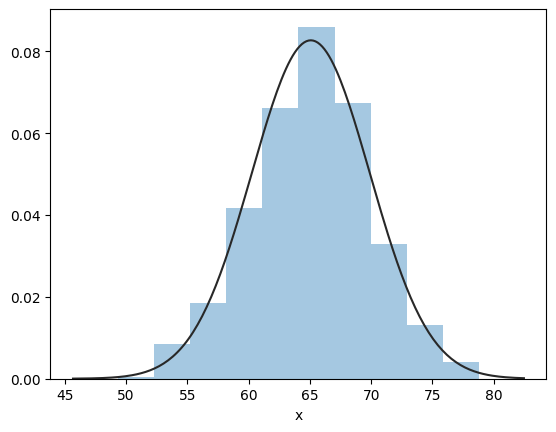

In [16]:
sns.distplot(a=training_data["x"],bins=10,fit=s.norm,kde=False)

SyntaxError: expected ':' (3104667226.py, line 1)